# Question 1

The D-dimensional Schwefel function:

$$f(x_1, x_2, \cdots,x_D) = 418.9829D - \sum_i^D x_i\sin(\sqrt{|x_i|})$$

where $x_i\in[-500, 500]$ for $i=1,2,\cdots,D$.

*For debugging*: The global minimum is 0, which is reached at $x_i=420.9687$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Schwefel(X):
    return 418.9829 * len(X) - np.sum(X * np.sin(np.sqrt(np.abs(X))))

# for visualization if you want
def plot_surface(func, x_min=-2, x_max=2, y_min=-2, y_max=2):
    a = np.linspace(x_min, x_max, 100)
    b = np.linspace(y_min, y_max, 100)
    x,y = np.meshgrid(a, b)
    z = func((x, y))
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(x, y, z)

In [3]:
# plot_surface accept a 10-dimensional input
def plot_surface_10D(func, x_min=-500, x_max=500, y_min=-500, y_max=500):
    a = np.linspace(x_min, x_max, 100)
    b = np.linspace(y_min, y_max, 100)
    x,y = np.meshgrid(a, b)
    z = np.zeros(x.shape)

    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i,j] = func(np.array([x[i,j], y[i,j]] + [0]*8))  # Fixing the rest of the dimensions to zero

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, z, cmap='viridis')

    ax.set_xlabel('x axis', size=9)
    ax.set_ylabel('y axis', size=9)
    ax.set_zlabel('Function value', size=9, labelpad=2)
    ax.view_init(25, 45)

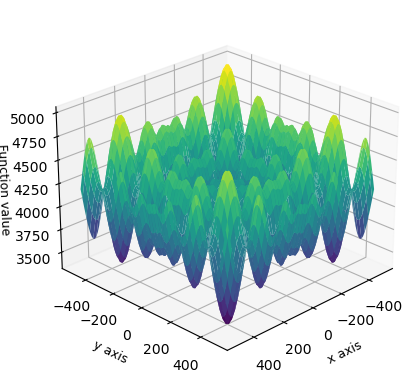

In [4]:
plot_surface_10D(Schwefel)

In [5]:
def SA(solution, func, schedule, delta, boundary, n_iter=10, report_interval=None):
    """ 
    Simulated Annealing for minimization
    
    Parameters
    ----------
    solution: np.ndarray
        Initial guess
    func: Callable
        Function to minimize
    schedule: np.ndarray
        An array of temperatures for simulated annealing
    delta: float
        Magnitude of random displacement
    boundary: tuple
        Boundary of the variables to minimize. (lowerbound,upperbound)
    n_iter: int
        Number of random displacement move in each temperature
    report_interavl: int
        Number of temperature steps to report result
    
    Returns
    -------
    res: dict
        Minimized point and its evaulation value
    """
    
    best_solution = solution.copy()
    lowest_eval = func(best_solution)
    
    for idx, temp in enumerate(schedule):
        if report_interval is not None and ((idx + 1) % report_interval == 0 or idx == 0):
            msg = (
                f"{idx + 1}/{len(schedule)}, Temp: {temp:.2f}, "
                f"Best solution: {best_solution}, Value: {lowest_eval:.7f}"
            )
            print(msg)
        
        for n in range(n_iter):
            trial = solution.copy()
            # do a random displacement
            trial += (2 * np.random.random(len(trial)) - 1) * delta
            if np.all(trial >= boundary[0]) and np.all(trial <= boundary[1]):
                # fill in acceptance criterion
                if np.exp(-(func(trial) - func(solution)) / temp) > np.random.random():
                    solution = trial
                    if func(solution) < lowest_eval:
                        # update solution here
                        best_solution = solution.copy()
                        lowest_eval = func(best_solution)
                        
    return {"solution":best_solution, "evaluation":lowest_eval}

In [6]:
starting = 500 * (np.random.random(10) * 2 - 1)

## (a)

*For debugging*: 

Length of schedule 5941 for 30K, 5981 for 10K (both initial temperature and final temperature are included in the schedule). The function evaluation of your solution usually falls in the range of 2000~4000 with `delta=0.5` and `n_iter=10`. 

In [7]:
def linear_cooling(init_temp, final_temp, alpha):
    temps = []
    temp = init_temp
    while temp >= final_temp:
        temps.append(temp)
        temp = temp - alpha
    return np.array(temps)

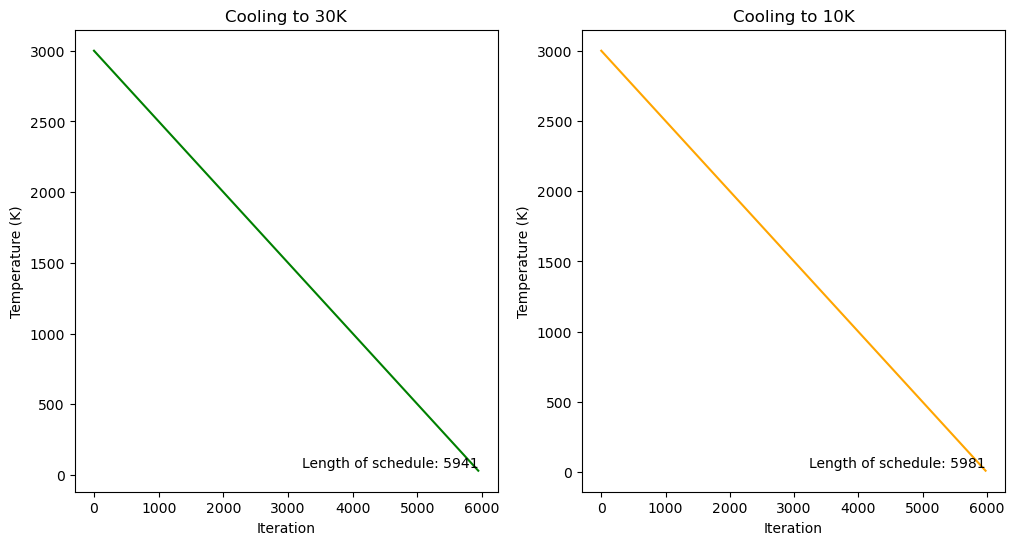

In [8]:
schedule_30K = linear_cooling(3000, 30, 0.5)
schedule_10K = linear_cooling(3000, 10, 0.5)

# Plotting both cooling schedules on the same plot
plt.figure(figsize=(12, 6))  # Set the figure size 

# First subplot for cooling to 30K
plt.subplot(1, 2, 1)  # (rows, columns, panel number)
plt.plot(schedule_30K, color='green')
plt.title('Cooling to 30K')
plt.xlabel('Iteration')
plt.ylabel('Temperature (K)')
# Label the length of schedule 30K
length_of_schedule_30K = len(schedule_30K)
plt.text(len(schedule_30K)-1, schedule_30K[-1], f'Length of schedule: {length_of_schedule_30K:}', ha='right', va='bottom')

# Second subplot for cooling to 10K
plt.subplot(1, 2, 2)
plt.plot(schedule_10K, color='orange')
plt.title('Cooling to 10K')
plt.xlabel('Iteration')
plt.ylabel('Temperature (K)')
# Label the length of schedule 10K
length_of_schedule_10K = len(schedule_10K)
plt.text(len(schedule_10K)-1, schedule_10K[-1], f'Length of schedule: {length_of_schedule_10K:}', ha='right', va='bottom')


plt.show()

In [9]:
values_30K = []
values_10K = []
for i in range(3):  # Run 3 times
    result_30K = SA(starting, Schwefel, schedule_30K, 0.5, (-500, 500))
    result_10K = SA(starting, Schwefel, schedule_10K, 0.5, (-500, 500))
    values_30K.append(result_30K['evaluation'])
    values_10K.append(result_10K['evaluation'])
    # Print average & standard deviation of minimized values of 3 runs
print(f"Minimized values at 30K: {np.mean(values_30K):.2f} +/- {np.std(values_30K):.2f}")
print(f"Minimized values at 10K: {np.mean(values_10K):.2f} +/- {np.std(values_10K):.2f}\n")

Minimized values at 30K: 3457.08 +/- 234.09
Minimized values at 10K: 2488.93 +/- 118.41



## (b)

*For debugging*:

The final temperature should be 326.10415680714726 (starting from 6000K) or 309.29382323518576 (starting from 3000K).

In [10]:
def log_cooling(init_temp, sigma, k):
    return [init_temp / (1 + init_temp * np.log(1 + i) / (3 * sigma)) for i in range(k)]


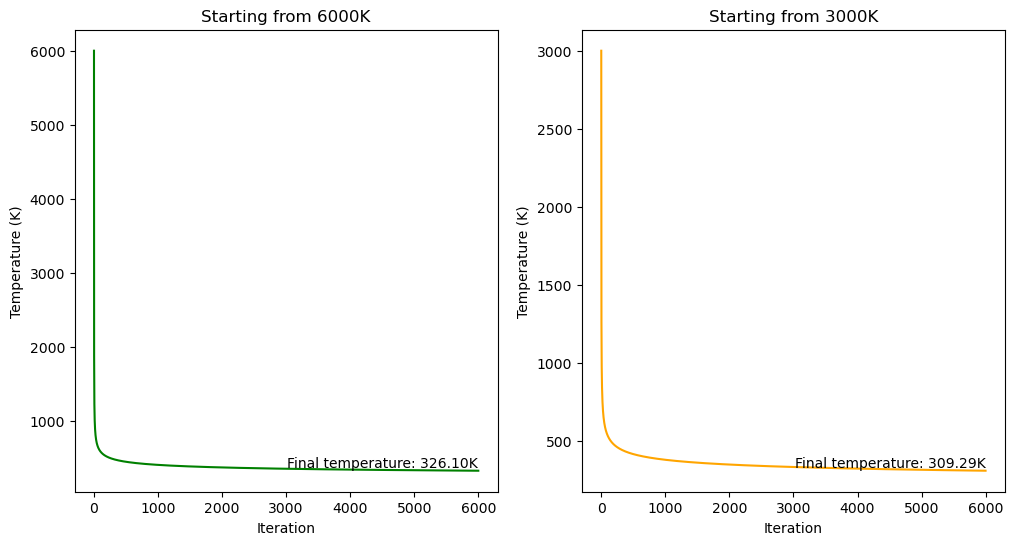

In [11]:
schedule_6000K = log_cooling(6000, 1000, 6000)
schedule_3000K = log_cooling(3000, 1000, 6000)

# Plotting both cooling schedules on the same plot
plt.figure(figsize=(12, 6))  # Set the figure size 

# First subplot for starting from 6000K
plt.subplot(1, 2, 1)  # (rows, columns, panel number)
plt.plot(schedule_6000K, color='green')
plt.title('Starting from 6000K')
plt.xlabel('Iteration')
plt.ylabel('Temperature (K)')
# Label the final temperature for the 6000K schedule
final_schedule_6000K = schedule_6000K[-1]
plt.text(len(schedule_6000K)-1, final_schedule_6000K, f'Final temperature: {final_schedule_6000K:.2f}K', ha='right', va='bottom')

# Second subplot for starting from 3000K
plt.subplot(1, 2, 2)
plt.plot(schedule_3000K, color='orange')
plt.title('Starting from 3000K')
plt.xlabel('Iteration')
plt.ylabel('Temperature (K)')
# Label the final temperature for the 3000K schedule
final_schedule_3000K = schedule_3000K[-1]
plt.text(len(schedule_3000K)-1, final_schedule_3000K, f'Final temperature: {final_schedule_3000K:.2f}K', ha='right', va='bottom')


plt.show()

In [12]:
values_6000K = []
values_3000K = []
for i in range(3):  # Run 3 times for each starting temperature
    result_6000K = SA(starting, Schwefel, schedule_6000K, 0.5, (-500, 500))
    result_3000K = SA(starting, Schwefel, schedule_3000K, 0.5, (-500, 500))
    values_6000K.append(result_6000K['evaluation'])
    values_3000K.append(result_3000K['evaluation'])
# Print average & standard deviation of minimized values of 3 runs
print(f"Minimized values starting from 6000K: {np.mean(values_6000K):.2f} +/- {np.std(values_6000K):.2f}")
print(f"Minimized values starting from 3000K: {np.mean(values_3000K):.2f} +/- {np.std(values_3000K):.2f}\n")

Minimized values starting from 6000K: 3052.65 +/- 357.92
Minimized values starting from 3000K: 2435.19 +/- 136.30



## Description
* **A logarithmic cooling schedule can provide better convergence properties compared to a linear cooling schedule**
* This is because logarithmic schedules decrease the temperature more slowly than linear schedules, allowing the algorithm more time to explore the solution space and thus reducing the chances of becoming trapped in local minima.
* The slower cooling in the logarithmic schedule gives the algorithm the ability to accept uphill moves, preventing premature convergence and providing a better chance of escaping local optima. This can be particularly important in complex optimization problems where the landscape is rugged with many local minima.

## (c) 

In [13]:
# construct your cooling schedule
def custom_schedule(init_temp, min_temp, max_temp, cycles, alpha_cool, alpha_heat):
    schedule = []
    temp = init_temp
    for _ in range(cycles):        
        # Cooling phase
        while temp > min_temp:
            schedule.append(temp)
            temp = temp * alpha_cool
        # Heating phase
        while temp < max_temp:
            schedule.append(temp)
            temp = temp / alpha_heat
    return schedule

Text(0, 0.5, 'Temperature (K)')

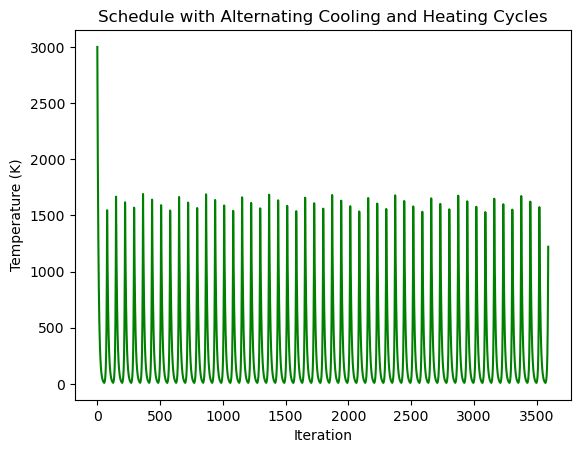

In [14]:
# Plotting alternative cooling and heating schedule
schedule_c = custom_schedule(3000, 10, 1500, 50, 0.9, 0.8)
plt.plot(schedule_c, color='green')
plt.title('Schedule with Alternating Cooling and Heating Cycles')
plt.xlabel('Iteration')
plt.ylabel('Temperature (K)')


In [15]:
# Local minimization methods fail to find the global minimum
from scipy.optimize import minimize

CG = minimize(Schwefel, starting, method="CG")
print(CG)

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 868.6702868398293
       x: [-3.025e+02  4.210e+02  2.038e+02  4.210e+02 -5.591e+02
           -1.248e+02 -3.025e+02  4.210e+02 -5.591e+02 -2.588e+01]
     nit: 12
     jac: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
            0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00]
    nfev: 352
    njev: 32


In [16]:
# Print average & standard deviation of minimized values of 3 runs
values_sa = []
starting_sa_new = []
values_sa_cg = []
for i in range(3):  # Run 3 times
    result_sa = SA(starting, Schwefel, schedule_c, 0.5, (-500, 500))
    values_sa.append(result_sa['evaluation'])
    starting_sa_new.append(result_sa['solution'])
print(f"Minimized values with only SA: {np.mean(values_sa):.2f} +/- {np.std(values_sa):.2f}")
for i in range(3):  # Run 3 times 
    result_sa_cg = minimize(Schwefel, starting_sa_new[i], method="CG")
    values_sa_cg.append(result_sa_cg['fun'])
print(f"Minimized values with SA+CG: {np.mean(values_sa_cg):.2f} +/- {np.std(values_sa_cg):.2f}\n")

Minimized values with only SA: 1940.07 +/- 318.57
Minimized values with SA+CG: 855.49 +/- 18.65



## Description 
* Alternative cooling and heating schedule is useful for high dimensions function like Schweful function, which is complex, with many local minima. This is because when the Simulated annealing algorithm is trapped by the local minima in the process of local searching, it can be heated to escape to the best possible solution route nearby, and then find the global minima faster.
<br>**The combination of SA and CG can be more effective than using either alone because:**
* SA provides a good starting point: SA can avoid becoming trapped in poor local optima early in the search, providing a more advantageous starting point for CG.
* CG fine-tunes the solution: Once SA has provided a promising region in the search space, CG is very efficient at navigating to the nearest optimum within that region.

# Question 2

## (a)
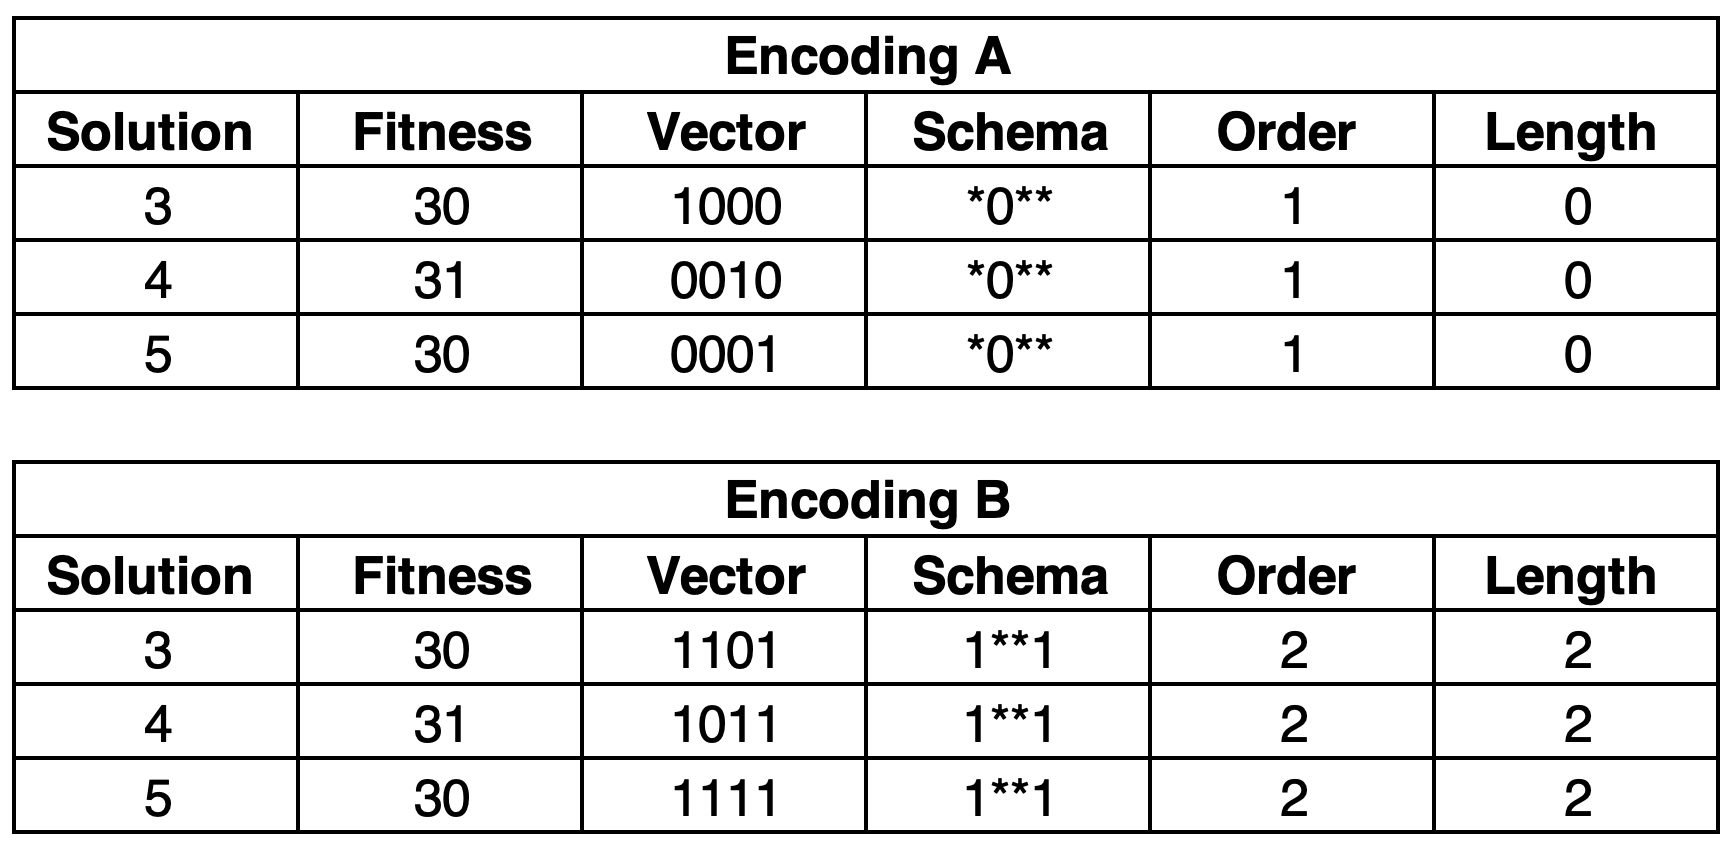
#### Answer:
**Encoding A would be the preferred choice**
<br>Given that the order and length are both smaller for Encoding A, according to Holland's schema theorem, this encoding is more likely to produce good solutions that will survive to subsequent generations. The theorem suggests that short-length, low-order schemas are less likely to be disrupted by genetic operations and are more likely to grow exponentially from generation to generation.

## (b)

In [17]:
import pandas as pd


solution_dict_a = {
    "1011": 0, "0011": 1, "1001": 2, "1000": 3,
    "0010": 4, "0001": 5, "0000": 6, "1010": 7,
    "0100": 8, "1100": 9, "0101":10, "0110":11,
    "0111":12, "1101":13, "1110":14, "1111":15
}


def func(vec):
    x = solution_dict_a[vec]
    return -x ** 2 + 8 * x + 15

def one_point_crossover(parent1, parent2, point):
    child1 = parent1[:point] + parent2[point:]
    child2 = parent2[:point] + parent1[point:]
    return child1, child2
    
# Function to evaluate and sort the population based on fitness
def evaluate_population(pop):
    df = pd.DataFrame({
        "Solutions": [solution_dict_a[vec] for vec in pop],
        "Vectors": pop,
        "Fitness": [func(vec) for vec in pop]
    })
    df.sort_values(by=["Fitness"], ascending=False, inplace=True)
    df.reset_index(inplace=True, drop=True)
    print(f"Total Fitness: {np.sum(df['Fitness'])}")
    print(f"Best Solution: {df.loc[0, 'Solutions']} (with fitness {df.loc[0, 'Fitness']})")
    return df

*For debugging*: Use the following function to test `one_point_crossover()`

In [18]:
def test_one_point_crossover():
    c1, c2 = one_point_crossover("0000", "1111", 1)
    if {c1, c2} == {"1000", "0111"}:
        print("Well done!")
    else:
        raise Exception("Wrong implementation")

test_one_point_crossover()

Well done!


In [19]:
# Encode the initial x-values into binary strings using Encoding A from the solution_dict
initial_pop = [list(solution_dict_a.keys())[list(solution_dict_a.values()).index(x)] for x in [10, 1, 15, 6, 0, 9]]

# Evaluate the initial population.
evaluated_pop_b = evaluate_population(initial_pop)

# Print the evaluated population.
print(evaluated_pop_b)

Total Fitness: -25
Best Solution: 6 (with fitness 27)
   Solutions Vectors  Fitness
0          6    0000       27
1          1    0011       22
2          0    1011       15
3          9    1100        6
4         10    0101       -5
5         15    1111      -90


*Hint*: Use `list.sort(key=...)` to sort a list of population according to its evaluation value. Maybe you can find [this](https://docs.python.org/3/howto/sorting.html#key-functions) useful.

In [20]:
def pair_population(df):
    paired_population = []
    for i in range(len(df) // 2):
        fittest = df.loc[i, 'Vectors']
        least_fit = df.loc[len(df) - 1 - i, 'Vectors']
        paired_population.append((fittest, least_fit))
    return paired_population

In [21]:
paired_pop_b = pair_population(evaluated_pop_b)
print(paired_pop_b)

[('0000', '1111'), ('0011', '0101'), ('1011', '1100')]


## (c)

In [22]:
# Perform crossover on each pair and collect the new population
new_pop_c = []
for pair in paired_pop_b:
    # Apply one_point_crossover with the crossover point between the 1st and 2nd element
    child1, child2 = one_point_crossover(pair[0], pair[1], 1)
    new_pop_c.extend([child1, child2])
print(new_pop_c)

# Evaluate the new population
new_evaluated_pop_c = evaluate_population(new_pop_c)
print(new_evaluated_pop_c)

# Check if the total fitness has increased after crossover
total_fitness_before = np.sum(evaluated_pop_b['Fitness'])
total_fitness_after = np.sum(new_evaluated_pop_c['Fitness'])
print(f"Total fitness before crossover: {total_fitness_before}")
print(f"Total fitness after crossover: {total_fitness_after}")
print(f"Is there an increase in total fitness? {'Yes' if total_fitness_after > total_fitness_before else 'No'}")

# Find if there is a new best solution
best_fitness_before = evaluated_pop_b['Fitness'].iloc[0]
best_fitness_after = new_evaluated_pop_c['Fitness'].iloc[0]
print(f"Best solution before crossover: {evaluated_pop_b['Solutions'].iloc[0]} with fitness {best_fitness_before}")
print(f"Best solution after crossover: {new_evaluated_pop_c['Solutions'].iloc[0]} with fitness {best_fitness_after}")
print(f"Is there a new best solution? {'Yes' if best_fitness_after > best_fitness_before else 'No'}")


['0111', '1000', '0101', '0011', '1100', '1011']
Total Fitness: 35
Best Solution: 3 (with fitness 30)
   Solutions Vectors  Fitness
0          3    1000       30
1          1    0011       22
2          0    1011       15
3          9    1100        6
4         10    0101       -5
5         12    0111      -33
Total fitness before crossover: -25
Total fitness after crossover: 35
Is there an increase in total fitness? Yes
Best solution before crossover: 6 with fitness 27
Best solution after crossover: 3 with fitness 30
Is there a new best solution? Yes


In [23]:
sorted_df_c = new_evaluated_pop_c.sort_values(by='Fitness', ascending=False).reset_index(drop=True)
# Extract the 'Vectors' column as a list
sorted_new_evaluated_pop_c = sorted_df_c['Vectors'].tolist()
print(sorted_new_evaluated_pop_c)

['1000', '0011', '1011', '1100', '0101', '0111']


## (d)

In [24]:
def mutate(vec, point):
    # Convert the string to a list to mutate it
    vec_list = list(vec)
    # Flip the bit at the mutation point
    vec_list[point] = '1' if vec_list[point] == '0' else '0'
    # Convert the list back to a string and return it
    return ''.join(vec_list)

*For debugging*: Use the following function to test `mutate()`

In [25]:
def test_mutate():
    if "0000" == mutate("0100", 1):
        print("Well done")
    else:
        raise Exception("Wrong implementation")
    
test_mutate()

Well done


In [26]:
# Mutate the third element (index 2) of each vector
mutated_pop_d = [mutate(vec, 2) for vec in sorted_new_evaluated_pop_c]  
print(mutated_pop_d)

# Evaluate the mutated population
mutated_evaluated_pop_d = evaluate_population(mutated_pop_d)
print(mutated_evaluated_pop_d)

# Check if the total fitness has increased after mutation
total_fitness_before = np.sum(new_evaluated_pop_c['Fitness'])
total_fitness_after = np.sum(mutated_evaluated_pop_d['Fitness'])
print(f"Total fitness before mutation: {total_fitness_before}")
print(f"Total fitness after mutation: {total_fitness_after}")
print(f"Is there an increase in total fitness? {'Yes' if total_fitness_after > total_fitness_before else 'No'}")

# Find if there is a new best solution
best_fitness_before = new_evaluated_pop_c['Fitness'].iloc[0]
best_fitness_after = mutated_evaluated_pop_d['Fitness'].iloc[0]
print(f"Best solution before mutation: {new_evaluated_pop_c['Solutions'].iloc[0]} with fitness {best_fitness_before}")
print(f"Best solution after mutation: {mutated_evaluated_pop_d['Solutions'].iloc[0]} with fitness {best_fitness_after}")
print(f"Is there a new best solution? {'Yes' if best_fitness_after > best_fitness_before else 'No'}")

['1010', '0001', '1001', '1110', '0111', '0101']
Total Fitness: -28
Best Solution: 5 (with fitness 30)
   Solutions Vectors  Fitness
0          5    0001       30
1          2    1001       27
2          7    1010       22
3         10    0101       -5
4         12    0111      -33
5         14    1110      -69
Total fitness before mutation: 35
Total fitness after mutation: -28
Is there an increase in total fitness? No
Best solution before mutation: 3 with fitness 30
Best solution after mutation: 5 with fitness 30
Is there a new best solution? No


In [27]:
sorted_df_d = mutated_evaluated_pop_d.sort_values(by='Fitness', ascending=False).reset_index(drop=True)
# Extract the 'Vectors' column as a list
sorted_mutated_evaluated_pop_d = sorted_df_d['Vectors'].tolist()
print(sorted_mutated_evaluated_pop_d)

['0001', '1001', '1010', '0101', '0111', '1110']


## (e)

In [28]:
def two_point_crossover(parent1, parent2):
    child1 = parent1[0] + parent2[1:3] + parent1[3]
    child2 = parent2[0] + parent1[1:3] + parent2[3]
    return child1, child2

*For debugging*: Use the following function to test `two_point_crossover()`

In [29]:
def test_two_point_crossover():
    c1, c2 = two_point_crossover("0000", "1111")
    if {c1, c2} == {"0110", "1001"}:
        print("Well done")
    else:
        raise Exception("Wrong implementation")

test_two_point_crossover()

Well done


In [30]:
# First, eliminate the least fit member
del sorted_mutated_evaluated_pop_d[-1]
print(sorted_mutated_evaluated_pop_d)

# Replace with cloned best member
best_vector = mutated_evaluated_pop_d.iloc[0]['Vectors']
sorted_mutated_evaluated_pop_d.append(best_vector)
print(sorted_mutated_evaluated_pop_d)

new_mutated_evaluated_pop = evaluate_population(sorted_mutated_evaluated_pop_d)
print(new_mutated_evaluated_pop)

['0001', '1001', '1010', '0101', '0111']
['0001', '1001', '1010', '0101', '0111', '0001']
Total Fitness: 71
Best Solution: 5 (with fitness 30)
   Solutions Vectors  Fitness
0          5    0001       30
1          5    0001       30
2          2    1001       27
3          7    1010       22
4         10    0101       -5
5         12    0111      -33


In [31]:
# Perform 2-point crossover on each pair and collect the new population
paired_pop = pair_population(new_mutated_evaluated_pop)
print(paired_pop)

new_pop_e = []
for parent1, parent2 in paired_pop:
    child1, child2 = two_point_crossover(parent1, parent2)
    new_pop_e.extend([child1, child2])
print(new_pop_e)

# Evaluate the new population
new_evaluated_pop_e = evaluate_population(new_pop_e)
print(new_evaluated_pop_e)

# Check if the total fitness has increased after mutation
total_fitness_before = np.sum(mutated_evaluated_pop_d['Fitness'])
total_fitness_after = np.sum(new_evaluated_pop_e['Fitness'])
print(f"Total fitness before mutation: {total_fitness_before}")
print(f"Total fitness after mutation: {total_fitness_after}")
print(f"Is there an increase in total fitness? {'Yes' if total_fitness_after > total_fitness_before else 'No'}")

# Find if there is a new best solution
best_fitness_before = mutated_evaluated_pop_d['Fitness'].iloc[0]
best_fitness_after = new_evaluated_pop_e['Fitness'].iloc[0]
print(f"Best solution before mutation: {mutated_evaluated_pop_d['Solutions'].iloc[0]} with fitness {best_fitness_before}")
print(f"Best solution after mutation: {new_evaluated_pop_e['Solutions'].iloc[0]} with fitness {best_fitness_after}")
print(f"Is there a new best solution? {'Yes' if best_fitness_after > best_fitness_before else 'No'}")

[('0001', '0111'), ('0001', '0101'), ('1001', '1010')]
['0111', '0001', '0101', '0001', '1011', '1000']
Total Fitness: 67
Best Solution: 5 (with fitness 30)
   Solutions Vectors  Fitness
0          5    0001       30
1          5    0001       30
2          3    1000       30
3          0    1011       15
4         10    0101       -5
5         12    0111      -33
Total fitness before mutation: -28
Total fitness after mutation: 67
Is there an increase in total fitness? Yes
Best solution before mutation: 5 with fitness 30
Best solution after mutation: 5 with fitness 30
Is there a new best solution? No


## (f)

In [32]:
sorted_df_f = new_evaluated_pop_e.sort_values(by='Fitness', ascending=False).reset_index(drop=True)
# Extract the 'Vectors' column as a list
sorted_new_evaluated_pop_e = sorted_df_f['Vectors'].tolist()
print(sorted_new_evaluated_pop_e)

['0001', '0001', '1000', '1011', '0101', '0111']


In [33]:
# First, eliminate the least fit member
del sorted_new_evaluated_pop_e[-1]
print(sorted_new_evaluated_pop_e)

# Replace with cloned best member
best_vector = new_evaluated_pop_e.iloc[0]['Vectors']
sorted_new_evaluated_pop_e.append(best_vector)
print(sorted_new_evaluated_pop_e)

new_evaluated_pop = evaluate_population(sorted_new_evaluated_pop_e)
print(new_evaluated_pop)


['0001', '0001', '1000', '1011', '0101']
['0001', '0001', '1000', '1011', '0101', '0001']
Total Fitness: 130
Best Solution: 5 (with fitness 30)
   Solutions Vectors  Fitness
0          5    0001       30
1          5    0001       30
2          3    1000       30
3          5    0001       30
4          0    1011       15
5         10    0101       -5


In [34]:
# Perform 2-point crossover on each pair and collect the new population
paired_pop = pair_population(new_evaluated_pop)
print(paired_pop)

new_pop_f = []
for pair in paired_pop:
    # Apply one_point_crossover with the crossover point between the 3rd and 4th element
    child1, child2 = one_point_crossover(pair[0], pair[1], 3)
    new_pop_f.extend([child1, child2])
print(new_pop_f)

# Evaluate the new population
new_evaluated_pop_f = evaluate_population(new_pop_f)
# Check for new solutions and fitness increase
print(new_evaluated_pop_f)

# Check if the total fitness has increased after mutation
total_fitness_before = np.sum(new_evaluated_pop_e['Fitness'])
total_fitness_after = np.sum(new_evaluated_pop_f['Fitness'])
print(f"Total fitness before mutation: {total_fitness_before}")
print(f"Total fitness after mutation: {total_fitness_after}")
print(f"Is there an increase in total fitness? {'Yes' if total_fitness_after > total_fitness_before else 'No'}")

# Find if there is a new best solution
best_fitness_before = new_evaluated_pop_e['Fitness'].iloc[0]
best_fitness_after = new_evaluated_pop_f['Fitness'].iloc[0]
print(f"Best solution before mutation: {new_evaluated_pop_e['Solutions'].iloc[0]} with fitness {best_fitness_before}")
print(f"Best solution after mutation: {new_evaluated_pop_f['Solutions'].iloc[0]} with fitness {best_fitness_after}")
print(f"Is there a new best solution? {'Yes' if best_fitness_after > best_fitness_before else 'No'}")

[('0001', '0101'), ('0001', '1011'), ('1000', '0001')]
['0001', '0101', '0001', '1011', '1001', '0000']
Total Fitness: 124
Best Solution: 5 (with fitness 30)
   Solutions Vectors  Fitness
0          5    0001       30
1          5    0001       30
2          2    1001       27
3          6    0000       27
4          0    1011       15
5         10    0101       -5
Total fitness before mutation: 67
Total fitness after mutation: 124
Is there an increase in total fitness? Yes
Best solution before mutation: 5 with fitness 30
Best solution after mutation: 5 with fitness 30
Is there a new best solution? No


## (g)

#### Do you think that the encoding of the solution space was adequate? Why?
* In steps (b) through (e), we have successfully improved the total fitness of the population and found better solutions through cross-over, mutation, replacing the least fit member with the cloned best member, and two-point cross-over, indicating that the encoding was effective for the genetic algorithm to work on.